In [1]:
!gdown 1Dh_y7gFDUa2sD72_cKIa209dhbMVoGEd

Downloading...
From: https://drive.google.com/uc?id=1Dh_y7gFDUa2sD72_cKIa209dhbMVoGEd
To: /mnt/hdd/Learning/AIO-Projects/Project-5.1/train-house-prices-advanced-regression-techniques.csv
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 461k/461k [00:00<00:00, 579kB/s]


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# import Dataset
house_df = pd.read_csv("./train-house-prices-advanced-regression-techniques.csv")

# checking dataset
house_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [3]:
house_df.shape

(1460, 81)

In [4]:
house_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

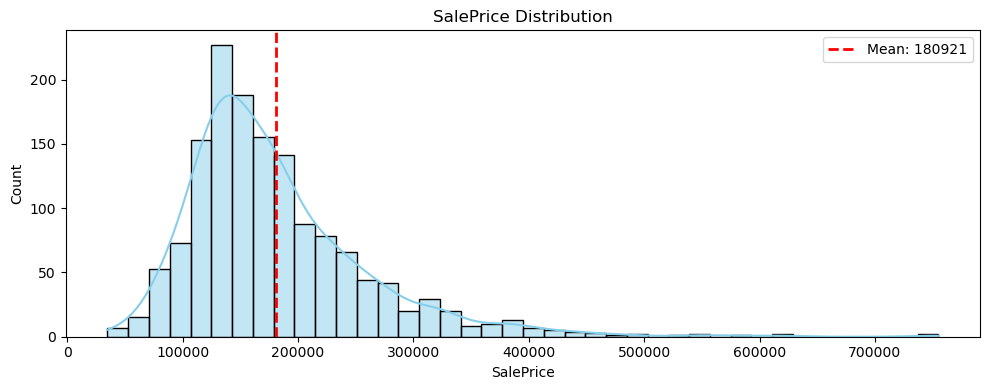

In [5]:
# Target Variable - Fix SalePrice axis, labeling, and mean visualization
plt.figure(figsize=(10, 4))
sns.histplot(house_df["SalePrice"], bins=40, kde=True, color="skyblue")
plt.axvline(x=house_df["SalePrice"].mean(), linestyle="--", linewidth=2, color="red", label=f"Mean: {house_df['SalePrice'].mean():.0f}")
plt.xlabel("SalePrice")
plt.ylabel("Count")
plt.title("SalePrice Distribution")
plt.legend()
plt.tight_layout()
plt.show()

Bi·ªÉu ƒë·ªì SalePrice c√≥ d·∫°ng l·ªách ph·∫£i r√µ r·ªát, v·ªõi ph·∫ßn l·ªõn gi√° nh√† t·∫≠p trung quanh 100k‚Äì200k, trung b√¨nh kho·∫£ng 181k, v√† m·ªôt s·ªë √≠t gi√° tr·ªã cao g√¢y ƒëu√¥i d√†i (right-skewed). Ph√¢n ph·ªëi n√†y kh√¥ng chu·∫©n n√™n th∆∞·ªùng c·∫ßn bi·∫øn ƒë·ªïi log ƒë·ªÉ m√¥ h√¨nh h·ªçc t·ªët h∆°n.

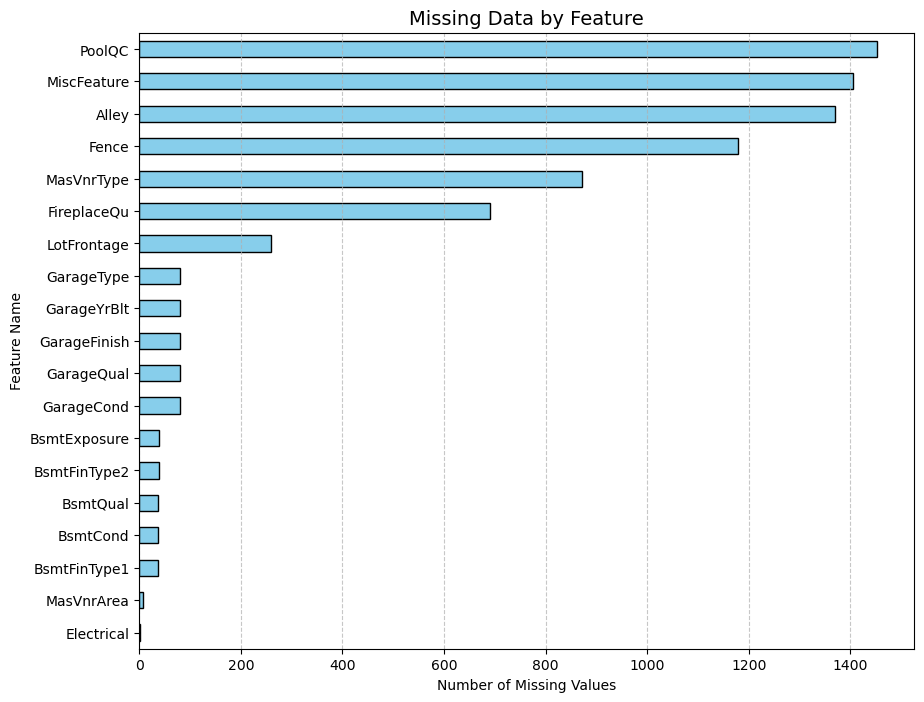

In [6]:
# Checking missing values (horizontal view)
missing = house_df.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
missing.plot.barh(color="skyblue", edgecolor="black")
plt.title("Missing Data by Feature", fontsize=14)
plt.xlabel("Number of Missing Values")
plt.ylabel("Feature Name")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.gca().invert_yaxis()
plt.show()

**1) ‚ÄúNA = Kh√¥ng c√≥‚Äù ‚Üí g√°n nh√£n None/No + s·ªë li·ªáu = 0**

Nh·ªØng c·ªôt m√† thi·∫øu nghƒ©a l√† kh√¥ng t·ªìn t·∫°i h·∫°ng m·ª•c:

**Basement**: BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
‚Üí ƒëi·ªÅn 'None' cho c√°c c·ªôt lo·∫°i/ch·∫•t l∆∞·ª£ng, v√† 0 cho di·ªán t√≠ch basement li√™n quan.

**Garage**: GarageType, GarageFinish, GarageQual, GarageCond; GarageYrBlt
‚Üí n·∫øu thi·∫øu ƒë·ªìng lo·∫°t ‚áí kh√¥ng c√≥ garage: ƒëi·ªÅn 'None', v√† GarageYrBlt = YearBuilt n·∫øu ch·∫Øc c√≥ garage, c√≤n 0/NaN ri√™ng n·∫øu th·ª±c s·ª± kh√¥ng c√≥ (t·∫°o c·ªù).

**Masonry veneer**: MasVnrType, MasVnrArea - *L·ªõp g·∫°ch/ƒë√° m·ªèng ƒë∆∞·ª£c ·ªëp ·ªü m·∫∑t ngo√†i t∆∞·ªùng nh√† ch·ªâ ƒë·ªÉ t·∫°o th·∫©m m·ªπ v√†/ho·∫∑c tƒÉng c√°ch nhi·ªát ‚Äì kh√¥ng ch·ªãu l·ª±c ch√≠nh c·ªßa c√¥ng tr√¨nh.*
‚Üí n·∫øu MasVnrType l√† NA ‚áí set 'None', MasVnrArea = 0.

**Fireplace**: FireplaceQu; thi·∫øu v√¨ kh√¥ng c√≥ l√≤ s∆∞·ªüi ‚áí 'None'.

**Alley, Fence, PoolQC, MiscFeature**: th∆∞·ªùng >90% thi·∫øu v√¨ ƒëa s·ªë kh√¥ng c√≥.
‚Üí g√°n 'None'. V·ªõi m√¥ h√¨nh tuy·∫øn t√≠nh, c√¢n nh·∫Øc drop n·∫øu bi·∫øn r·∫•t √≠t th√¥ng tin (ho·∫∑c ch·ªâ gi·ªØ c·ªù HasX).

L∆∞u √Ω: Sau khi ƒëi·ªÅn, t·∫°o bi·∫øn c·ªù: HasBsmt, HasGarage, HasFireplace, HasPool, HasFence, HasAlley, HasMasonry ƒë·ªÉ m√¥ h√¨nh n·∫Øm ƒë∆∞·ª£c ‚Äúban ƒë·∫ßu l√† thi·∫øu‚Äù.

**2) ‚ÄúNA ‚â† Kh√¥ng c√≥‚Äù ‚Üí impute theo c·∫•u tr√∫c kh√¥ng gian/khu ph·ªë**

**LotFrontage** (~18% thi·∫øu): kh√¥ng ph·∫£i ‚Äúkh√¥ng c√≥‚Äù, m√† kh√≥ ƒëo/kh√¥ng ghi ‚Üí th∆∞·ªùng MAR theo khu ph·ªë.

- C√°ch t·ªët: median theo Neighborhood (v√†/ho·∫∑c theo zoning), ho·∫∑c h·ªìi quy nh·ªè d√πng Neighborhood, LotArea**0.5, Street, MSSubClass.

- T·∫°o c·ªù LF_missing ƒë·ªÉ m√¥ h√¨nh bi·∫øt ƒë√¢y l√† ∆∞·ªõc l∆∞·ª£ng.

**GarageYrBlt** (m·ªôt √≠t thi·∫øu l·∫ª t·∫ª): n·∫øu nh√† ch·∫Øc ch·∫Øn c√≥ garage theo c√°c c·ªôt kh√°c ‚Üí ƒëi·ªÅn YearBuilt ho·∫∑c median theo GarageType.

**MasVnrArea** khi MasVnrType kh√¥ng None nh∆∞ng Area thi·∫øu ‚Üí d√πng median theo MasVnrType.

**3) ‚ÄúThi·∫øu r·∫•t √≠t‚Äù ‚Üí ƒëi·ªÅn mode/median an to√†n**

**Electrical** (thi·∫øu ~1 tr∆∞·ªùng h·ª£p): ƒëi·ªÅn mode.

C√°c c·ªôt hi·∫øm kh√°c n·∫øu c√≥: median/mode + kh√¥ng nh·∫•t thi·∫øt c·∫ßn c·ªù (v√¨ t·∫ßn su·∫•t qu√° th·∫•p).

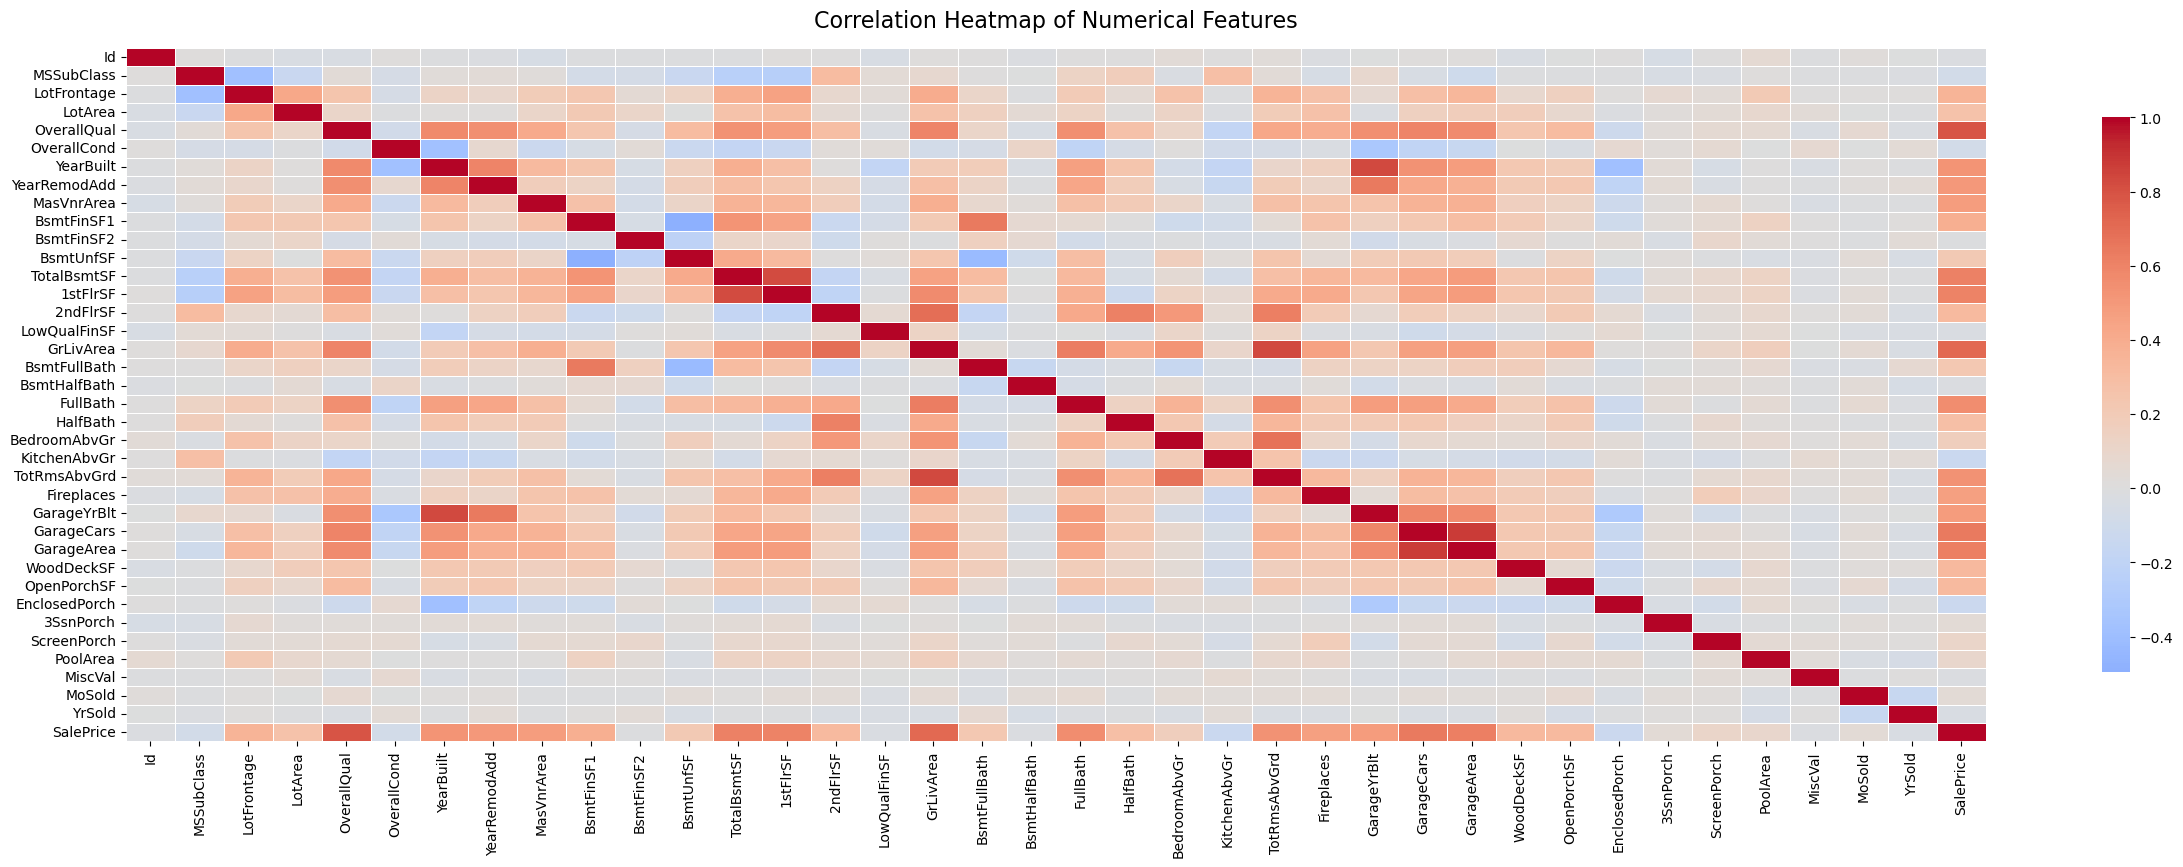

In [7]:
plt.figure(figsize=(30, 9))
sns.heatmap(
    house_df.corr(numeric_only=True),
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, pad=15)
plt.show()


**1) Bi·∫øn li√™n quan m·∫°nh nh·∫•t ƒë·∫øn SalePrice**

**`OverallQual`** ‚Üë m·∫°nh nh·∫•t (ƒë·ªè ƒë·∫≠m) ‚Üí ch·∫•t l∆∞·ª£ng t·ªïng th·ªÉ l√† y·∫øu t·ªë s·ªë 1.

**`GrLivArea`** (di·ªán t√≠ch s√†n ·ªü tr√™n ƒë·∫•t) ‚Üë r·∫•t m·∫°nh.

**`GarageCars/GarageArea, TotalBsmtSF, 1stFlrSF, YearBuilt/YearRemodAdd, FullBath, Fireplaces, MasVnrArea`**: t∆∞∆°ng quan d∆∞∆°ng v·ª´a‚Äìm·∫°nh.

**`MSSubClass`**: t∆∞∆°ng quan √¢m (m√£ l·ªõp c√†ng cao th∆∞·ªùng nh√† r·∫ª h∆°n).

**`YrSold, MoSold, Id`**: g·∫ßn nh∆∞ kh√¥ng li√™n quan.

**2) C·ª•m ƒëa c·ªông tuy·∫øn (co-linearity) d·ªÖ th·∫•y**

`GarageCars ‚Üî GarageArea` (g·∫ßn 1).

`TotalBsmtSF ‚Üî 1stFlrSF; BsmtFinSF1 ‚Üî TotalBsmtSF`.

`GrLivArea ‚Üî 2ndFlrSF ‚Üî TotRmsAbvGrd`.

`YearBuilt ‚Üî GarageYrBlt ‚Üî YearRemodAdd`.

`LotFrontage ‚Üî LotArea` (v·ª´a).

üëâ V·ªõi m√¥ h√¨nh tuy·∫øn t√≠nh, n√™n ch·ªçn m·ªôt ƒë·∫°i di·ªán trong m·ªói c·∫∑p/c·ª•m ho·∫∑c d√πng regularization (Ridge/Lasso/ElasticNet) ƒë·ªÉ tr√°nh h·ªá s·ªë ‚Äúnh·∫£y m√∫a‚Äù. M√¥ h√¨nh c√¢y (LGBM/XGB) b·ªõt nh·∫°y c·∫£m h∆°n.

**3) H√†m √Ω ti·ªÅn x·ª≠ l√Ω & ƒë·∫∑c tr∆∞ng**

Do nhi·ªÅu bi·∫øn di·ªán t√≠ch li√™n quan m·∫°nh ‚Üí c√¢n nh·∫Øc log1p cho SalePrice, GrLivArea, TotalBsmtSF, LotArea ƒë·ªÉ gi·∫£m l·ªách/ph·∫ßn ƒëu√¥i.

T·∫°o feature t·ªïng/h·ª£p:

`AgeAtSale = YrSold - YearBuilt, YearsSinceRemod = YrSold - YearRemodAdd`

`BathsTotal = FullBath + 0.5*HalfBath (+ BsmtFull/HalfBath)`

`C·ªù Has2ndFlr = (2ndFlrSF>0), HasBsmt = (TotalBsmtSF>0), HasGarage, HasFireplace`

`MSSubClass` l√† danh m·ª•c m√£ h√≥a s·ªë ‚Üí chuy·ªÉn category/one-hot (kh√¥ng coi l√† li√™n t·ª•c).

**4) Ki·ªÉm ƒë·ªãnh/outlier**

C√°c m·ªëi li√™n h·ªá r·∫•t m·∫°nh nh∆∞ `GrLivArea‚ÄìSalePrice` th∆∞·ªùng c√≥ v√†i outlier leverage (nh√† c·ª±c l·ªõn nh∆∞ng gi√° th·∫•p) ‚Üí n√™n ki·ªÉm tra scatter v√† x·ª≠ l√Ω (robust/huber ho·∫∑c lo·∫°i b·ªè c√≥ l√Ω do).

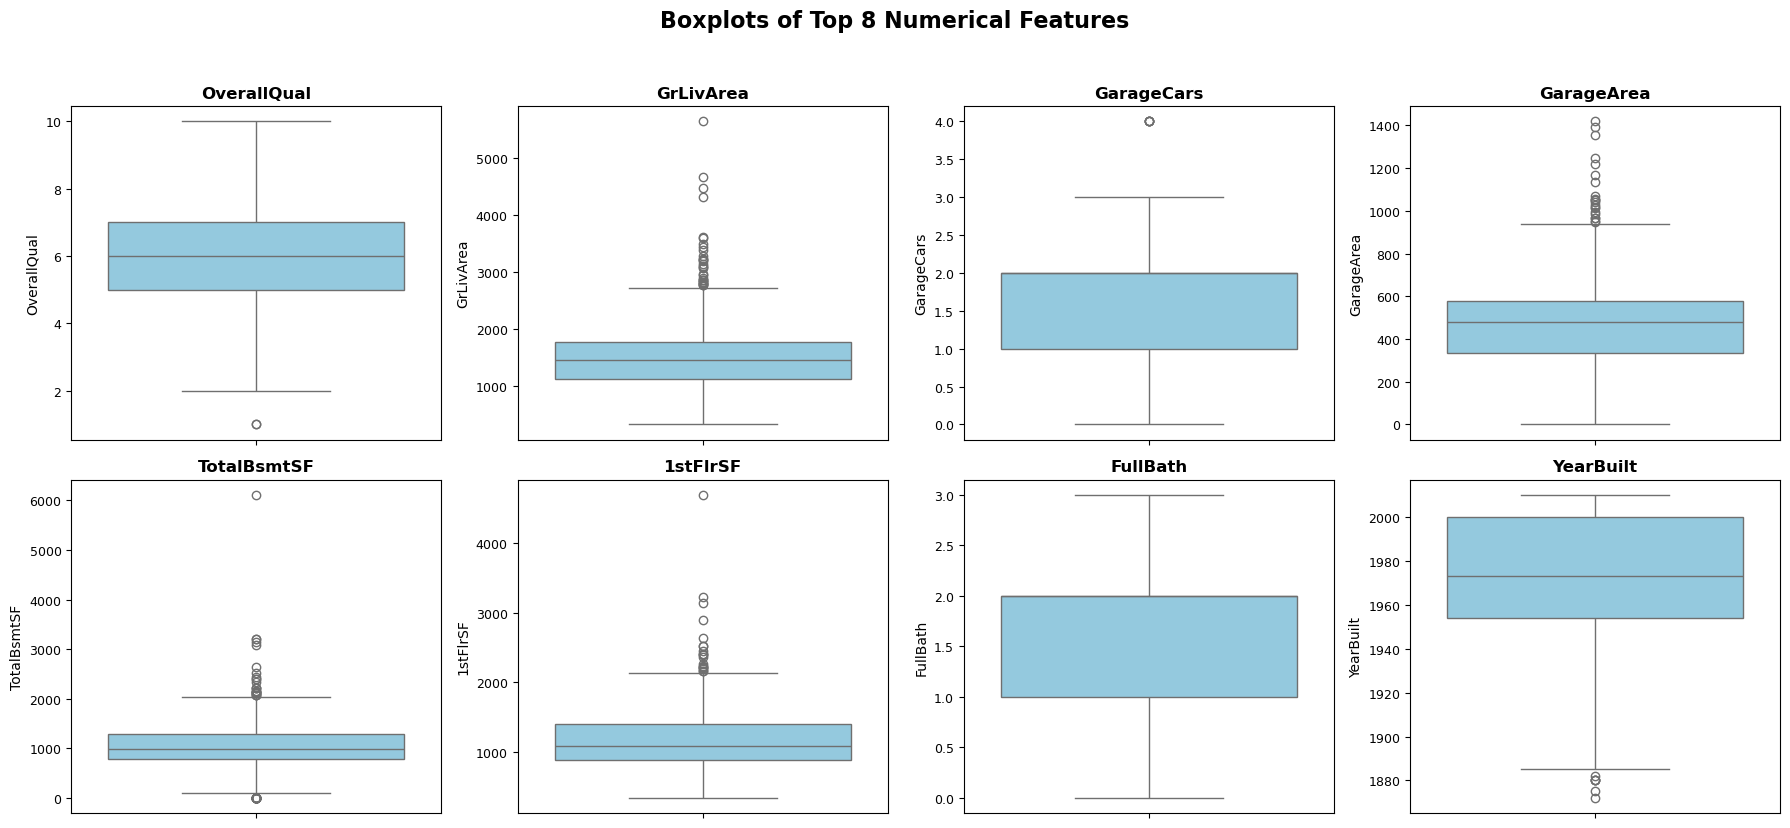

In [8]:
# Ch·ªçn 8 ƒë·∫∑c tr∆∞ng numeric quan tr·ªçng nh·∫•t d·ª±a tr√™n t∆∞∆°ng quan v·ªõi SalePrice
important_cols = [
    "OverallQual", "GrLivArea", "GarageCars", "GarageArea",
    "TotalBsmtSF", "1stFlrSF", "FullBath", "YearBuilt"
]

fig, axes = plt.subplots(2, 4, figsize=(18, 8))
axes = axes.flatten()

for i, col in enumerate(important_cols):
    sns.boxplot(data=house_df, y=col, ax=axes[i], color="skyblue")
    axes[i].set_title(col, fontsize=12, fontweight="bold")
    axes[i].tick_params(labelsize=9)

# ·∫®n nh·ªØng subplot kh√¥ng d√πng t·ªõi (trong tr∆∞·ªùng h·ª£p axes nhi·ªÅu h∆°n s·ªë c·ªôt)
for i in range(len(important_cols), len(axes)):
    axes[i].set_visible(False)

plt.suptitle("Boxplots of Top 8 Numerical Features", fontsize=16, fontweight="bold", y=1.03)
plt.tight_layout()
plt.show()



OverallQual (ordinal 1‚Äì10): trung v·ªã ‚âà 6‚Äì7, kh√° c√¢n nh∆∞ng c√≥ v√†i outlier th·∫•p (1‚Äì2) v√† r·∫•t cao (10). ‚Üí ƒê√∫ng ch·∫•t ordinal, n√™n gi·ªØ thang b·∫≠c; tr√°nh one-hot.

GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF: ƒë·ªÅu l·ªách ph·∫£i m·∫°nh, c√≥ outlier r·∫•t l·ªõn (GrLivArea > 4500 ft¬≤; TotalBsmtSF ~6000 ft¬≤). ‚Üí C√¢n nh·∫Øc log1p ho·∫∑c winsorize (v√≠ d·ª• top 0.5‚Äì1%) ƒë·ªÉ gi·∫£m ·∫£nh h∆∞·ªüng ƒëi·ªÉm ƒë√≤n b·∫©y.

GarageCars (0‚Äì4) v√† FullBath (0‚Äì3): r·ªùi r·∫°c v·ªõi ‚Äúb·∫≠c thang‚Äù r√µ; median l·∫ßn l∆∞·ª£t ‚âà 2 v√† 2. ‚Üí Gi·ªØ d·∫°ng s·ªë nguy√™n r·ªùi r·∫°c; c√≥ th·ªÉ th√™m c·ªù HasGarage = (GarageCars>0), HasFullBath = (FullBath>0).

YearBuilt: l·ªách tr√°i nh·∫π (nhi·ªÅu nh√† m·ªõi h∆°n), c√≥ m·ªôt s·ªë r·∫•t c≈© (~1870s) l√† outlier ·ªü ƒë√°y. ‚Üí T·∫°o tu·ªïi nh√†: AgeAtSale = YrSold - YearBuilt th∆∞·ªùng h·ªØu √≠ch h∆°n, √≠t l·ªách h∆°n.

In [9]:
# droping values more than 50%
house_df = house_df.drop(["Id","Alley","PoolQC","Fence","MiscFeature"], axis=1)

In [10]:
# create training and validation sets
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    house_df,
    test_size=0.25,
    random_state=42
)

y_train = train_df["SalePrice"].values
y_test = test_df["SalePrice"].values
train_df = train_df.drop(["SalePrice"], axis=1)
test_df = test_df.drop(["SalePrice"], axis=1)

num_cols = [col for col in train_df.columns if train_df[col].dtype in ["float64", "int64"]]
cat_cols = [col for col in train_df.columns if train_df[col].dtype not in ["float64", "int64"]]

# fill none for categorical columns
train_df[cat_cols] = train_df[cat_cols].fillna("none")
test_df[cat_cols] = test_df[cat_cols].fillna("none")


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoder.fit(train_df[cat_cols])

encoded_cols = list(encoder.get_feature_names_out(cat_cols))

train_encoded = encoder.transform(train_df[cat_cols])
test_encoded = encoder.transform(test_df[cat_cols])

train_df = train_df.drop(cat_cols, axis=1)
test_df = test_df.drop(cat_cols, axis=1)

train_df[encoded_cols] = train_encoded
test_df[encoded_cols] = test_encoded

imputer = SimpleImputer()
train_df[num_cols] = imputer.fit_transform(train_df[num_cols])
test_df[num_cols] = imputer.transform(test_df[num_cols])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_num_features = scaler.fit_transform(train_df[num_cols])
test_num_features = scaler.transform(test_df[num_cols])

X_train = np.hstack([train_num_features, train_df[encoded_cols].values])
X_test = np.hstack([test_num_features, test_df[encoded_cols].values])


In [14]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Th√™m Huber Regression v√†o danh s√°ch model
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "HuberRegressor": HuberRegressor()
}

# Kh·ªüi t·∫°o list l∆∞u k·∫øt qu·∫£
train_rmse_results = []
test_rmse_results = []
train_r2_results = []
test_r2_results = []
model_names = []

# Gi·∫£ s·ª≠ target v√† d·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c chu·∫©n h√≥a t·ª´ c√°c √¥ tr∆∞·ªõc
# N·∫øu ch∆∞a c√≥ y_train, y_test th√¨ c·∫ßn th√™m b∆∞·ªõc chia train/test ·ªü ph√≠a tr√™n
# ·ªû ƒë√¢y gi·∫£ ƒë·ªãnh y_train, y_test ƒë√£ t·ªìn t·∫°i

for name, model in models.items():
    regressor = model
    regressor.fit(X_train, y_train)
    
    # D·ª± ƒëo√°n
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)
    
    # T√≠nh RMSE
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # T√≠nh R2
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # L∆∞u k·∫øt qu·∫£
    model_names.append(name)
    train_rmse_results.append(train_rmse)
    test_rmse_results.append(test_rmse)
    train_r2_results.append(train_r2)
    test_r2_results.append(test_r2)

# T·∫°o DataFrame t·ªïng h·ª£p
df_results = pd.DataFrame({
    "Model": model_names,
    "Train_RMSE": train_rmse_results,
    "Test_RMSE": test_rmse_results,
    "Train_R2": train_r2_results,
    "Test_R2": test_r2_results
}).sort_values(by="Test_R2", ascending=False)

df_results


Model    Train_RMSE     Test_RMSE  Train_R2   Test_R2
2             Lasso  20029.220606  27231.819644  0.933925  0.894141
3    HuberRegressor  27696.469261  27899.572823  0.873655  0.888886
0  LinearRegression  20029.220254  28136.997313  0.933925  0.886987
1             Ridge  22488.286583  28587.343381  0.916705  0.883340

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create polynomial features (interaction only, degree=2, no bias)
poly_features = PolynomialFeatures(
    degree=2, interaction_only=True, include_bias=False
)

train_poly_features = poly_features.fit_transform(X_train)
test_poly_features = poly_features.transform(X_test)

scaler = MinMaxScaler()
train_poly_features = scaler.fit_transform(train_poly_features)
test_poly_features = scaler.transform(test_poly_features) 

X_train_poly = np.hstack([train_poly_features, train_df[encoded_cols].values])
X_test_poly = np.hstack([test_poly_features, test_df[encoded_cols].values])

models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "HuberRegressor": HuberRegressor()
}

# lists to store results
r2_results = []
rmse_results = []
train_rmse_results = []
train_r2_results = []
model_names = []

# training and evaluating each model
for name, model in models.items():
    regressor = model
    regressor.fit(X_train_poly, y_train)

    # predict
    y_train_pred = regressor.predict(X_train_poly)
    y_test_pred = regressor.predict(X_test_poly)

    # metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # store
    model_names.append(name)
    train_rmse_results.append(train_rmse)
    rmse_results.append(test_rmse)
    train_r2_results.append(train_r2)
    r2_results.append(test_r2)

# create dataframe
df_results = pd.DataFrame({
    "Model": model_names,
    "Train_RMSE": train_rmse_results,
    "Test_RMSE": rmse_results,
    "Train_R2": train_r2_results,
    "Test_R2": r2_results
}).sort_values(by="Test_R2", ascending=False)

df_results


Model    Train_RMSE     Test_RMSE  Train_R2   Test_R2
3    HuberRegressor  1.592651e+04  27916.907370  0.958222  0.888748
1             Ridge  9.958969e+02  29594.928047  0.999837  0.874972
0  LinearRegression  1.135923e-09  29839.897520  1.000000  0.872894
2             Lasso  5.726899e+02  32028.713604  0.999946  0.853563